In [1]:
from pyspark.sql import SQLContext

In [2]:
sc

<SparkContext master=local[*] appName=launch_ipykernel.py>

In [3]:
def loadCSV(file):
    return SQLContext(sc).read.csv(file, header='true', inferSchema = 'true')

In [4]:
from decimal import Decimal
class Timer():
    def __init__(self):
        self.totalTime = 0
        self.time = 0
        self.list = []
        
    def wallTime(self, timing):
        start = timing.find('Wall time: ') + 11
        end = timing.find(' ms', start)
        if end == -1:
            endsec = timing.find(' s', start)
            if endsec == -1:
                endmin = timing.find('min', start)
                minutes = Decimal(timing[start:endmin])
                endsec = timing.find('s', start)
                startsec = endmin+4
                seconds = Decimal(timing[startsec:endsec])
                return (minutes*60+seconds)*1000
            else:
                return Decimal(timing[start:endsec])*1000
        else:
            return Decimal(timing[start:end])
                
    def timeTotal(self):
        standardOutput = result.stdout
        print(standardOutput)
        self.time = self.wallTime(standardOutput)
        self.list.append(self.time/1000)
        self.totalTime = self.totalTime + self.time
        print("Time: " + str(self.time/1000) + " s")
        print("Total Time: " + str(self.totalTime/1000) + " s")
        
    def getTotalTime(self):
        return self.totalTime
    
    def getLastTime(self):
        return self.time  
    
    def getList(self):
        return self.list

In [5]:
sparkloadtimer = Timer()

In [6]:
%%capture result
%%time 
df_data_aircraft = loadCSV('/project_data/data_asset/aircraft.csv')

In [7]:
sparkloadtimer.timeTotal()

CPU times: user 2.95 ms, sys: 1.22 ms, total: 4.18 ms
Wall time: 6.2 s

Time: 6.2 s
Total Time: 6.2 s


In [8]:
%%capture result
%%time 
df_data_ontime_11 = loadCSV('/project_data/data_asset/ONTIME2011.csv')

In [9]:
sparkloadtimer.timeTotal()

CPU times: user 4.53 ms, sys: 2.9 ms, total: 7.43 ms
Wall time: 30.4 s

Time: 30.4 s
Total Time: 36.6 s


In [10]:
%%capture result
%%time 
df_data_ontime_12 = loadCSV('/project_data/data_asset/ONTIME2012.csv')

In [11]:
sparkloadtimer.timeTotal()

CPU times: user 4.8 ms, sys: 705 us, total: 5.5 ms
Wall time: 26.5 s

Time: 26.5 s
Total Time: 63.1 s


In [12]:
%%capture result
%%time 
df_data_ontime_13 = loadCSV('/project_data/data_asset/ONTIME2013.csv')

In [13]:
sparkloadtimer.timeTotal()

CPU times: user 3.83 ms, sys: 2.52 ms, total: 6.36 ms
Wall time: 27.8 s

Time: 27.8 s
Total Time: 90.9 s


In [14]:
%%capture result
%%time 
df_data_ontime_14 = loadCSV('/project_data/data_asset/ONTIME2014.csv')

In [15]:
sparkloadtimer.timeTotal()

CPU times: user 2.88 ms, sys: 3.26 ms, total: 6.14 ms
Wall time: 26.4 s

Time: 26.4 s
Total Time: 117.3 s


In [16]:
%%capture result
%%time 
df_data_ontime_15 = loadCSV('/project_data/data_asset/ONTIME2015.csv')

In [17]:
sparkloadtimer.timeTotal()

CPU times: user 3.59 ms, sys: 1.92 ms, total: 5.5 ms
Wall time: 24.1 s

Time: 24.1 s
Total Time: 141.4 s


In [18]:
times = sparkloadtimer.getList()
for t in times:
    print(t)

6.2
30.4
26.5
27.8
26.4
24.1


In [19]:
df_data_aircraft.show(5)
df_data_aircraft.printSchema()

+----------+------------+-----------+
|TAILNUMBER|MANUFACTURER|      MODEL|
+----------+------------+-----------+
|    N789SW|      Boeing|  B-737-7H4|
|    N198UW|      Airbus|   A321-211|
|    N681UP|      Boeing|     B747-1|
|    N54711|      Boeing|B737-700PAX|
|    N390SW|      Boeing|  B-737-3H4|
+----------+------------+-----------+
only showing top 5 rows

root
 |-- TAILNUMBER: string (nullable = true)
 |-- MANUFACTURER: string (nullable = true)
 |-- MODEL: string (nullable = true)



In [20]:
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

df_data_ontime = unionAll(df_data_ontime_11, df_data_ontime_12, df_data_ontime_13, df_data_ontime_14, df_data_ontime_15)

In [21]:
%%time
df_data_ontime.printSchema()

root
 |-- DAYKEY: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- QUARTERKEY: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTHKEY: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFMONTH: integer (nullable = true)
 |-- DAYOFWEEK: integer (nullable = true)
 |-- FLIGHTDATE: string (nullable = true)
 |-- UNIQUECARRIER: string (nullable = true)
 |-- AIRLINEID: integer (nullable = true)
 |-- CARRIER: string (nullable = true)
 |-- TAILNUM: string (nullable = true)
 |-- FLIGHTNUM: integer (nullable = true)
 |-- ORIGINAIRPORTID: integer (nullable = true)
 |-- ORIGINAIRPORTSEQID: integer (nullable = true)
 |-- ORIGINCITYMARKETID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGINCITYNAME: string (nullable = true)
 |-- ORIGINSTATE: string (nullable = true)
 |-- ORIGINSTATEFIPS: integer (nullable = true)
 |-- ORIGINSTATENAME: string (nullable = true)
 |-- ORIGINWAC: integer (nullable = true)
 |-- DEST

In [22]:
%%time
df_data_aircraft.count()

CPU times: user 480 µs, sys: 1.14 ms, total: 1.62 ms
Wall time: 433 ms


13101

In [23]:
df_data_aircraft.printSchema()

root
 |-- TAILNUMBER: string (nullable = true)
 |-- MANUFACTURER: string (nullable = true)
 |-- MODEL: string (nullable = true)



In [24]:
%%time
df_data_ontime.count()

CPU times: user 3.6 ms, sys: 148 µs, total: 3.75 ms
Wall time: 18.2 s


30190408

In [25]:
%%time
df_data_ontime.createGlobalTempView("ontime")

CPU times: user 1.45 ms, sys: 378 µs, total: 1.82 ms
Wall time: 308 ms


In [26]:
%%time
df_data_aircraft.createGlobalTempView("aircraft")

CPU times: user 956 µs, sys: 0 ns, total: 956 µs
Wall time: 7.51 ms


In [27]:
%%time
sql = \
"""
SELECT TAILNUMBER, MANUFACTURER, MODEL, FLIGHTDATE, UNIQUECARRIER, FLIGHTNUM, ORIGINCITYNAME, DESTCITYNAME, DEPDELAY, ARRDELAY
  FROM global_temp.ontime OT, global_temp.aircraft AC 
  WHERE AC.TAILNUMBER = OT.TAILNUM
  AND AC.MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.ORIGINSTATE = 'NJ'
  AND OT.DESTSTATE = 'CA'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 2000
  AND OT.DEPDELAY > 180
  ORDER BY ARRDELAY
"""
spark.sql(sql).show()

+----------+------------+-------------+--------------------+-------------+---------+--------------+--------------------+--------+--------+
|TAILNUMBER|MANUFACTURER|        MODEL|          FLIGHTDATE|UNIQUECARRIER|FLIGHTNUM|ORIGINCITYNAME|        DESTCITYNAME|DEPDELAY|ARRDELAY|
+----------+------------+-------------+--------------------+-------------+---------+--------------+--------------------+--------+--------+
|    N16217|      Boeing|  B737-800PAX|2012-08-09-00.00....|           UA|     1083|    Newark, NJ|Santa Ana, CA    ...|     232|    null|
|    N31412|      Boeing|  B737-900PAX|2014-06-19-00.00....|           UA|     1554|    Newark, NJ|San Francisco, CA...|     181|    null|
|    N38454|      Boeing|B737-900ERPAX|2014-07-02-00.00....|           UA|     1047|    Newark, NJ|Los Angeles, CA  ...|     181|     153|
|    N39475|      Boeing|B737-900ERPAX|2014-01-03-00.00....|           UA|     1047|    Newark, NJ|San Francisco, CA...|     184|     163|
|    N37462|      Boeing|B7

In [28]:
%%capture result
%%time
sql = \
"""
SELECT TAILNUMBER, MANUFACTURER, MODEL, FLIGHTDATE, UNIQUECARRIER, FLIGHTNUM, ORIGINCITYNAME, DESTCITYNAME, DEPDELAY, ARRDELAY
  FROM global_temp.ontime OT, global_temp.aircraft AC 
  WHERE AC.TAILNUMBER = OT.TAILNUM
  AND AC.MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.ORIGINSTATE = 'NJ'
  AND OT.DESTSTATE = 'CA'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 2000
  AND OT.DEPDELAY > 180
  ORDER BY ARRDELAY
"""
spark.sql(sql).show()

In [29]:
sqlsparktimer = Timer()
sqlsparktimer.timeTotal()

+----------+------------+-------------+--------------------+-------------+---------+--------------+--------------------+--------+--------+
|TAILNUMBER|MANUFACTURER|        MODEL|          FLIGHTDATE|UNIQUECARRIER|FLIGHTNUM|ORIGINCITYNAME|        DESTCITYNAME|DEPDELAY|ARRDELAY|
+----------+------------+-------------+--------------------+-------------+---------+--------------+--------------------+--------+--------+
|    N16217|      Boeing|  B737-800PAX|2012-08-09-00.00....|           UA|     1083|    Newark, NJ|Santa Ana, CA    ...|     232|    null|
|    N31412|      Boeing|  B737-900PAX|2014-06-19-00.00....|           UA|     1554|    Newark, NJ|San Francisco, CA...|     181|    null|
|    N38454|      Boeing|B737-900ERPAX|2014-07-02-00.00....|           UA|     1047|    Newark, NJ|Los Angeles, CA  ...|     181|     153|
|    N39475|      Boeing|B737-900ERPAX|2014-01-03-00.00....|           UA|     1047|    Newark, NJ|San Francisco, CA...|     184|     163|
|    N37462|      Boeing|B7

In [30]:
# !wget https://raw.githubusercontent.com/IBM/db2-jupyter/master/db2.ipynb
!wget -O db2.ipynb https://raw.githubusercontent.com/Db2-DTE-POC/Db2-Openshift-11.5.4/master/db2.ipynb

%run db2.ipynb
print('db2.ipynb loaded')

--2021-12-03 16:52:21--  https://raw.githubusercontent.com/Db2-DTE-POC/Db2-Openshift-11.5.4/master/db2.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168432 (164K) [text/plain]
Saving to: ‘db2.ipynb’

db2.ipynb           100%[===================>] 164.48K  --.-KB/s    in 0.01s   

2021-12-03 16:52:21 (15.3 MB/s) - ‘db2.ipynb’ saved [168432/168432]

Db2 Extensions Loaded.
db2.ipynb loaded


In [31]:
# Connect to the Data Virtualization Database from inside of IBM Cloud Pak for Data
database = 'bigsql'
user = 'admin'
password = 'CP4DDataFabric'
host = '10.0.0.201'
port = '31193'

%sql CONNECT TO {database} USER {user} USING {password} HOST {host} PORT {port}

Connection successful.


In [32]:
nicknames = %sql select TABSCHEMA, TABNAME from syscat.nicknames WHERE OWNER = 'ADMIN' ORDER BY TABSCHEMA, TABNAME
display(nicknames)

,TABSCHEMA,TABNAME
0,ADMIN,stock_symbols
1,CHURN,POPULATION
2,CHURN,STATUS
3,CSVCHURN,Demographics
4,CSVCHURN,Location
...,...,...
84,XLSX,CUSTOMER
85,XLSX,PORTFOLIO
86,XLSX,STOCK_HISTORY
87,XLSX,STOCK_SYMBOLS


In [ ]:
%%time
%%sql 
SELECT AC."TAIL_NUMBER", AC."MANUFACTURER", AC."MODEL", OT."UNIQUECARRIER", OT."AIRLINEID", OT."CARRIER", OT."TAILNUM", OT."FLIGHTNUM", OT."ORIGINAIRPORTID", OT."ORIGINAIRPORTSEQID", OT."ORIGINCITYNAME", OT."ORIGINSTATE", OT."DESTAIRPORTID", OT."DESTCITYNAME", OT."DESTSTATE", OT."DEPTIME", OT."DEPDELAY", OT."TAXIOUT", OT."WHEELSOFF", OT."WHEELSON", OT."TAXIIN", OT."ARRTIME", OT."ARRDELAY", OT."ARRDELAYMINUTES", OT."CANCELLED", OT."AIRTIME", OT."DISTANCE"
  FROM "ONTIME"."ONTIME" OT, "ONTIME"."AIRCRAFT" AC 
  WHERE AC."TAIL_NUMBER" = OT.TAILNUM
  AND ORIGINSTATE = 'NJ'
  AND DESTSTATE = 'CA'
  AND AC.MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 2000
  AND OT.DEPDELAY > 200
  ORDER BY OT.ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

In [ ]:
%%capture result
%%time
%%sql 
SELECT AC."TAIL_NUMBER", AC."MANUFACTURER", AC."MODEL", OT."UNIQUECARRIER", OT."AIRLINEID", OT."CARRIER", OT."TAILNUM", OT."FLIGHTNUM", OT."ORIGINAIRPORTID", OT."ORIGINAIRPORTSEQID", OT."ORIGINCITYNAME", OT."ORIGINSTATE", OT."DESTAIRPORTID", OT."DESTCITYNAME", OT."DESTSTATE", OT."DEPTIME", OT."DEPDELAY", OT."TAXIOUT", OT."WHEELSOFF", OT."WHEELSON", OT."TAXIIN", OT."ARRTIME", OT."ARRDELAY", OT."ARRDELAYMINUTES", OT."CANCELLED", OT."AIRTIME", OT."DISTANCE"
  FROM "ONTIME"."ONTIME" OT, "ONTIME"."AIRCRAFT" AC 
  WHERE AC."TAIL_NUMBER" = OT.TAILNUM
  AND ORIGINSTATE = 'NJ'
  AND DESTSTATE = 'CA'
  AND AC.MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 2000
  AND OT.DEPDELAY > 200
  ORDER BY OT.ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

In [ ]:
sqldvtimer = Timer()
sqldvtimer.timeTotal()

In [35]:
!wget -O CPDDVRestClassV35.ipynb https://raw.githubusercontent.com/Db2-DTE-POC/CPDDVLAB/master/CPDDVRestClassV35.ipynb
%run CPDDVRestClassV35.ipynb

--2021-12-03 16:53:18--  https://raw.githubusercontent.com/Db2-DTE-POC/CPDDVLAB/master/CPDDVRestClassV35.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12385 (12K) [text/plain]
Saving to: ‘CPDDVRestClassV35.ipynb’

CPDDVRestClassV35.i 100%[===================>]  12.09K  --.-KB/s    in 0s      

2021-12-03 16:53:18 (62.8 MB/s) - ‘CPDDVRestClassV35.ipynb’ saved [12385/12385]



In [36]:
# Import the class libraries 
import requests
import ssl
import json
from pprint import pprint
from requests import Response
import pandas as pd
import time
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
from IPython.display import IFrame
from IPython.display import display, HTML
from pandas import json_normalize
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [37]:
# Run the Db2 Class library
# Used to construct and reuse an Autentication Key
# Used to construct RESTAPI URLs and JSON payloads
class Db2():
    
    def __init__(self, url, verify = False, proxies=None, ):
        self.url = url
        self.proxies = proxies
        self.verify = verify

    def authenticate(self, api, userid, password):
        
        credentials = {'username':userid, 'password':password}
        r = requests.post(self.url+api+'/preauth/signin', verify=self.verify, json=credentials, proxies=self.proxies)
        if (r.status_code == 200):
            bearerToken = "Bearer " + r.cookies["ibm-private-cloud-session"]
            print('Token Retrieved')
            self.headers = {'Content-Type':"application/json", 'Accept':"application/json", 'Authorization': bearerToken, 'Cache-Control': "no-cache"}
        else:
            print ('Unable to authenticate, no bearer token obtained')
        
    def printResponse(self, r, code):
        if (r.status_code == code):
            pprint(r.json())
        else:
            print (r.status_code)
            print (r.content)
    
    def getRequest(self, api, json=None):
        return requests.get(self.url+api, verify = self.verify, headers=self.headers, proxies = self.proxies, json=json)

    def postRequest(self, api, json=None):
        return requests.post(self.url+api, verify = self.verify, headers=self.headers, proxies = self.proxies, json=json) 
    
    def deleteRequest(self, api, json=None):
        return requests.delete(self.url+api, verify = self.verify, headers=self.headers, proxies = self.proxies, json=json) 
        
    def getStatusCode(self, response):
        return (response.status_code)

    def getJSON(self, response):
        return (response.json())
    
    def getSchemas(self):
        return self.getRequest('/icpd-instanceata-databases/dv/cpd-instance/dbapi/v4/schemas')
           
    def getSearchViewList(self, searchtext, show_systems="false"):
        return self.getRequest('/icpd-instanceata-databases/dv/cpd-instance/dbapi/v4/admin/schemas/obj_type/view?search_name='+searchtext+'&show_systems='+str(show_systems)+'&rows_return=200');
    
    def getSearchTableList(self, searchtext):
        return self.getRequest('/icpd-instanceata-databases/dv/cpd-instance/dbapi/v4/admin/schemas/obj_type/table?search_name='+searchtext+'&show_systems=true&rows_return=100');
               
    def postSearchObjects(self, obj_type, search_text, rows_return=100, show_systems='false', is_ascend='true'):     
        json = {"search_name":search_text,"rows_return":rows_return,"show_systems":show_systems,"obj_type":obj_type,"filters_match":"ALL","filters":[]}       
        return self.postRequest('/icpd-instanceata-databases/dv/cpd-instance/dbapi/v4/admin/'+str(obj_type)+'s',json);
            
    def getTablesInSchema(self, schema):
        return self.getRequest('/icpd-instanceata-databases/dv/cpd-instance/dbapi/v4/schemas/'+str(schema)+'/tables'); 

    def getVirtualizedTables(self):
        return self.getRequest('/icp4data-databases/dv/cpd-instance/dvapiserver/v1/mydata/tables')
    
    def getVirtualizedTablesDF(self):
        r = self.getVirtualizedTables()
        if (self.getStatusCode(r)==200):
            json = self.getJSON(r)
            df = pd.DataFrame(json_normalize(json['tables']))
            return df
        else:
            print(self.getStatusCode(r))
            
    def getVirtualizedViews(self):
        return self.getRequest('/icp4data-databases/dv/cpd-instance/dvapiserver/v1/mydata/views')
    
    def getVirtualizedViewsDF(self):
        r = self.getVirtualizedViews()
        if (self.getStatusCode(r)==200):
            json = self.getJSON(r)
            df = pd.DataFrame(json_normalize(json['views']))
            return df
        else:
            print(self.getStatusCode(r))
    
    def grantPrivledgeToRole(self, objectName, objectSchema, roleToGrant):
        json =   {"objectName":objectName,"objectSchema":objectSchema,"roleToGrant":roleToGrant}
        return self.postRequest('/icpd-instanceata-databases/dv/cpd-instance/dvapiserver/v1/privileges/roles',json);
 
    def getRole(self, role):
        return self.getRequest('/icpd-instanceata-databases/dv/cpd-instance/dvapiserver/v1/privileges/objects/role/'+str(role));
    
    def foldData(self, sourceName, sourceTableDef, sources ):
        json = {"sourceName":sourceName,"sourceTableDef":sourceTableDef,"sources":sources}
        return self.postRequest('/icpd-instanceata-databases/dv/cpd-instance/dvapiserver/v1/virtualize/tables', json);

    def addUser(self, username, displayName, email, user_roles, password):
        json = {"username":username,"displayName":displayName,"email":email,"user_roles":user_roles,"password":password}
        return self.postRequest('/api/v1/usermgmt/v1/user', json);
    
    def dropUser(self, username):
        return self.deleteRequest('/api/v1/usermgmt/v1/user/'+str(username));
   
    def getUsers(self):
        return self.getRequest('/api/v1/usermgmt/v1/usermgmt/users');
    
    def getUsersDF(self):
        r = self.getUsers()
        if (self.getStatusCode(r)==200):
            json = self.getJSON(r)
            df = pd.DataFrame(json_normalize(json))
            return df
        else:
            print(self.getStatusCode(r));
    
    def addUserToDV(self, display_name, role, usersDF):
        userrow = (usersDF.loc[usersDF['displayName'] == display_name])
        uid = userrow['uid'].values[0]
        username = userrow['username'].values[0]
        
        json = {"users":[{"uid":uid,"username":username,"display_name":display_name,"role":role}],"serviceInstanceID":"1635944153872816"}
        return self.postRequest('/zen-data/v2/serviceInstance/users', json);
    
    def dropUserFromDV(self, display_name, usersDF):
        userrow = (usersDF.loc[usersDF['displayName'] == display_name])
        uid = userrow['uid'].values[0]
        
        json = {"users":[uid],"serviceInstanceID":"1635944153872816"}
        return self.deleteRequest('/zen-data/v2/serviceInstance/users', json);
    
    def deleteVirtualizedTable(self, table_schema, table_name, data_source_table_name):
        payload = {"table_schema":table_schema,"table_name":table_name,"data_source_table_name":data_source_table_name}
        return self.deleteRequest('/icpd-instanceata-databases/dv/cpd-instance/dbapi/v4/federation', payload);
    
    def deleteView(self, schema, view):
        return self.deleteRequest('/icpd-instanceata-databases/dv/cpd-instance/dbapi/v4/federation/views/'+str(schema)+'/'+str(view))

    def getDataSourcesAPI(self):
        return self.getRequest('/icpd-instanceata-databases/dv/cpd-instance/dvapiserver/v1/datasource_nodes')
    
    def getDataSources(self):
        columns = ['cid','connection_id', 'dbname', 'srchostname', 'srcport','srctype','status','usr','uri']
        dfTotal = pd.DataFrame(columns=columns)
        r = self.getDataSourcesAPI()
        if (self.getStatusCode(r)==200):
            json = self.getJSON(r)
            df = pd.DataFrame(json_normalize(json))
            for index, row in df.iterrows():
                if row['agent_class']!='F':
                    dfTotal = pd.concat([dfTotal, pd.DataFrame(json_normalize(row['dataSources']))],ignore_index=True)
            return(dfTotal[['srctype','srchostname', 'srcport', 'dbname', 'usr', 'status']])
        else:
            print(getStatusCode(r))    
            
    def getCaches(self, type='Available'):
        # type = 'Enabled', 'Disabled', 'Deleted', 'All'
        r = self.getRequest('/icp4data-databases/dv/cpd-instance/dv-caching/api/v1/caches')
        json = databaseAPI.getJSON(r)
        df = pd.DataFrame(json_normalize(json['caches']))
        if (type == 'Available'):
            return df[df["state"].isin(['Enabled','Disabled'])]
        elif (type == 'Enabled'):
            return df[df["state"] == 'Enabled']
        elif (type == 'Disabled'):
            return df[df["state"] == 'Disabled']
        elif (type == 'Deleted'):
            return df[df["state"] == 'Deleted']
    
    def enableCache(self, cache):
        return self.postRequest('/icp4data-databases/dv/cpd-instance/dv-caching/api/v1/enable/'+str(cache));
        
    def disableCache(self, cache):
        return self.postRequest('/icp4data-databases/dv/cpd-instance/dv-caching/api/v1/disable/'+str(cache));
     
    def refreshCache(self, cache):
        return self.postRequest('/icp4data-databases/dv/cpd-instance/dv-caching/api/v1/disable/refresh/'+str(cache));    

In [38]:
# Set the service URL to connect from inside the ICPD Cluster
Console  = 'https://10.0.0.201:31192'

# Connect to the Db2 Data Management Console service
user     = 'admin'
password = 'CP4DDataFabric'

# Set up the required connection
databaseAPI = Db2(Console)
api = '/v1'
databaseAPI.authenticate(api, user, password)
database = Console

Token Retrieved


In [ ]:
### Display Virtualized Tables and Views 
display(databaseAPI.getVirtualizedTablesDF())
display(databaseAPI.getVirtualizedViewsDF())

In [39]:
df = databaseAPI.getCaches('Enabled')
display(df[['id', 'name','state','size', 'cardinality','last_refresh_timestamp']])

,id,name,state,size,cardinality,last_refresh_timestamp
1,DV20211110165634403313,BOEING737,Enabled,56967,4172450,2021-11-10 18:30:21.411623
2,DV20211115151427714635,ONTIME737NJCA,Enabled,554,37621,2021-11-15 15:33:30.254003
6,DV20211110144113849337,ONTIME0910,Enabled,591398,12752436,2021-11-10 16:32:41.327378
7,DV20211115221309388288,AIRCRAFT,Enabled,106,13101,2021-12-03 16:36:36.670765
9,DV2021110817343042456,ChurnAll,Enabled,363,7043,2021-11-08 17:34:38.554237
10,DV20211110144049703423,ONTIME1115,Enabled,1399806,30190408,2021-11-10 15:01:13.967413


In [40]:
df = databaseAPI.getCaches('Disabled')
display(df[['id', 'name','state','size', 'cardinality','last_refresh_timestamp']])

,id,name,state,size,cardinality,last_refresh_timestamp
0,DV202111161222469697,ONTIME0915,Disabled,1309298,30238851,2021-11-16 12:59:22.006647


In [41]:
# Disable ONTIME1115
databaseAPI.disableCache('DV20211110144113849337')

<Response [202]>

In [42]:
# Disable ONTIME0910
databaseAPI.disableCache('DV20211110144049703423')

<Response [202]>

In [43]:
# Disable BOEING737
databaseAPI.disableCache('DV20211110165634403313')

<Response [202]>

In [44]:
# Disable ONTIME737NJCA
databaseAPI.disableCache('DV20211115151427714635')

<Response [202]>

In [45]:
# Disable AIRCRAFT
databaseAPI.disableCache('DV20211115221309388288')

<Response [202]>

In [ ]:
df = databaseAPI.getCaches('Enabled')
display(df[['id', 'name','state','size', 'cardinality','last_refresh_timestamp']])

In [46]:
# Connect to the Data Virtualization Database from inside of IBM Cloud Pak for Data
database = 'bigsql'
user = 'admin'
password = 'CP4DDataFabric'
host = '10.0.0.201'
port = '31193'

%sql CONNECT TO {database} USER {user} USING {password} HOST {host} PORT {port}

Connection successful.


In [47]:
%%sql 
SELECT * FROM "ONTIME"."ONTIME" OT, "ONTIME"."AIRCRAFT" AC 
  WHERE AC."TAIL_NUMBER" = OT.TAILNUM
  AND ORIGINSTATE = 'NJ'
  AND DESTSTATE = 'CA'
  AND MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 2000
  AND OT.DEPDELAY > 200
  ORDER BY OT.ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

,DAYKEY,YEAR,QUARTERKEY,QUARTER,MONTHKEY,MONTH,DAYOFMONTH,DAYOFWEEK,FLIGHTDATE,UNIQUECARRIER,AIRLINEID,CARRIER,TAILNUM,FLIGHTNUM,ORIGINAIRPORTID,ORIGINAIRPORTSEQID,ORIGINCITYMARKETID,ORIGIN,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATEFIPS,ORIGINSTATENAME,ORIGINWAC,DESTAIRPORTID,DESTAIRPORTSEQID,DESTCITYMARKETID,DEST,DESTCITYNAME,DESTSTATE,DESTSTATEFIPS,DESTSTATENAME,DESTWAC,CRSDEPTIME,DEPTIME,DEPDELAY,DEPDELAYMINUTES,DEPDEL15,DEPARTUREDELAYGROUPS,DEPTIMEBLK,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,ARRDELAYMINUTES,ARRDEL15,ARRIVALDELAYGROUPS,ARRTIMEBLK,CANCELLED,CANCELLATIONCODE,DIVERTED,CRSELAPSEDTIME,ACTUALELAPSEDTIME,AIRTIME,FLIGHTS,DISTANCE,DISTANCEGROUP,CARRIERDELAY,WEATHERDELAY,NASDELAY,SECURITYDELAY,LATEAIRCRAFTDELAY,FIRSTDEPTIME,TOTALADDGTIME,LONGESTADDGTIME,DIVAIRPORTLANDINGS,DIVREACHEDDEST,DIVACTUALELAPSEDTIME,DIVARRDELAY,DIVDISTANCE,DIV1AIRPORT,DIV1AIRPORTID,DIV1AIRPORTSEQID,DIV1WHEELSON,DIV1TOTALGTIME,DIV1LONGESTGTIME,DIV1WHEELSOFF,DIV1TAILNUM,DIV2AIRPORT,DIV2AIRPORTID,DIV2AIRPORTSEQID,DIV2WHEELSON,DIV2TOTALGTIME,DIV2LONGESTGTIME,DIV2WHEELSOFF,DIV2TAILNUM,DIV3AIRPORT,DIV3AIRPORTID,DIV3AIRPORTSEQID,DIV3WHEELSON,DIV3TOTALGTIME,DIV3LONGESTGTIME,DIV3WHEELSOFF,DIV3TAILNUM,DIV4AIRPORT,DIV4AIRPORTID,DIV4AIRPORTSEQID,DIV4WHEELSON,DIV4TOTALGTIME,DIV4LONGESTGTIME,DIV4WHEELSOFF,DIV4TAILNUM,DIV5AIRPORT,DIV5AIRPORTID,DIV5AIRPORTSEQID,DIV5WHEELSON,DIV5TOTALGTIME,DIV5LONGESTGTIME,DIV5WHEELSOFF,DIV5TAILNUM,UNKNOWNCOL110,NUMROWS,TAIL_NUMBER,MANUFACTURER,MODEL
0,20091101,2009,200904,4,200911,11,1,7,2009-11-01,CO,19704,CO,N78506,787,11618,1161801,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,14908,1490802,32575,SNA,"Santa Ana, CA",CA,6,California,91,1730,2219,289,289,1,12,1700-1759,31,2250,NaN,NaN,2057,NaN,NaN,NaN,NaN,NaN,2000-2059,0,None,1,387,NaN,NaN,1,2433,10,NaN,NaN,NaN,NaN,NaN,None,None,None,1,0.0,None,None,36.0,LAX,12892.0,1289201.0,117.0,5.0,5.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,N78506,Boeing,B737-800PAX
1,20120809,2012,201203,3,201208,8,9,4,2012-08-09,UA,19977,UA,N16217,1083,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,1823,2215,232,232,1,12,1800-1859,55,2310,NaN,NaN,2133,NaN,NaN,NaN,NaN,NaN,2100-2159,0,None,1,370,NaN,NaN,1,2434,10,NaN,NaN,NaN,NaN,NaN,None,None,None,1,0.0,None,None,36.0,LAX,12892.0,1289203.0,123.0,8.0,8.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,N16217,Boeing,B737-800PAX
2,20150531,2015,201502,2,201505,5,31,7,2015-05-31,UA,19977,UA,N37470,1670,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,14771,1477102,32457,SFO,"San Francisco, CA",CA,6,California,91,1500,2019,319,319,1,12,1500-1559,77,2136,34.0,6.0,1815,40.0,385.0,385.0,1.0,12.0,1800-1859,0,None,0,375,441.0,358.0,1,2565,11,0.0,314.0,66.0,0.0,5.0,None,None,None,0,NaN,None,None,NaN,,NaN,NaN,NaN,NaN,NaN,None,,,None,None,None,None,None,None,,,None,None,None,None,None,None,,,None,None,None,None,None,None,,,None,None,None,None,None,None,,None,1,N37470,Boeing,B737-900ERPAX
3,20120810,2012,201203,3,201208,8,10,5,2012-08-10,UA,19977,UA,N73291,17,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,1300,1847,347,347,1,12,1300-1359,39,1926,2141.0,31.0,1552,2212.0,380.0,380.0,1.0,12.0,1500-1559,0,None,0,352,385.0,315.0,1,2454,10,347.0,0.0,33.0,0.0,0.0,None,None,None,0,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,N73291,Boeing,B737-800PAX
4,20150615,2015,201502,2,201506,6,15,1,2015-06-15,UA,19977,UA,N78524,1289,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,128

In [48]:
%%capture result
%%time
%%sql 
SELECT * FROM "ONTIME"."ONTIME" OT, "ONTIME"."AIRCRAFT" AC 
  WHERE AC."TAIL_NUMBER" = OT.TAILNUM
  AND ORIGINSTATE = 'NJ'
  AND DESTSTATE = 'CA'
  AND MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 2000
  AND OT.DEPDELAY > 200
  ORDER BY OT.ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

In [49]:
print(result)
sqldvnocachetimer = Timer()
sqldvnocachetimer.timeTotal()

CPU times: user 21.6 ms, sys: 4.19 ms, total: 25.8 ms
Wall time: 1min 24s

CPU times: user 21.6 ms, sys: 4.19 ms, total: 25.8 ms
Wall time: 1min 24s

Time: 84 s
Total Time: 84 s


In [50]:
# Enable ONTIME1115
databaseAPI.enableCache('DV20211110144113849337')

<Response [202]>

In [51]:
# Enable ONTIME0910
databaseAPI.enableCache('DV20211110144049703423')

<Response [202]>

In [52]:
# Enable AIRCRAFT
databaseAPI.enableCache('DV20211115221309388288')

<Response [202]>

In [53]:
df = databaseAPI.getCaches('Enabled')
display(df[['id', 'name','state','size', 'cardinality','last_refresh_timestamp']])

,id,name,state,size,cardinality,last_refresh_timestamp
9,DV2021110817343042456,ChurnAll,Enabled,363,7043,2021-11-08 17:34:38.554237


In [54]:
%%capture result
%%time
%%sql 
SELECT * FROM "ONTIME"."ONTIME" OT, "ONTIME"."AIRCRAFT" AC 
  WHERE AC."TAIL_NUMBER" = OT.TAILNUM
  AND ORIGINSTATE = 'NJ'
  AND DESTSTATE = 'CA'
  AND MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 2000
  AND OT.DEPDELAY > 200
  ORDER BY OT.ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

In [55]:
print(result)
sqldvbigcachetimer = Timer()
sqldvbigcachetimer.timeTotal()

CPU times: user 19.5 ms, sys: 2.96 ms, total: 22.5 ms
Wall time: 50.8 s

CPU times: user 19.5 ms, sys: 2.96 ms, total: 22.5 ms
Wall time: 50.8 s

Time: 50.8 s
Total Time: 50.8 s


In [56]:
# Enable BOEING737
databaseAPI.enableCache('DV20211110165634403313')

<Response [202]>

In [57]:
# Enable ONTIME737NJCA
databaseAPI.enableCache('DV20211115151427714635')

<Response [202]>

In [58]:
%%capture result
%%time
%%sql 
SELECT * FROM "ONTIME"."BOEING737" OT, "ONTIME"."AIRCRAFT" AC 
  WHERE ORIGINSTATE = 'NJ'
  AND DESTSTATE = 'CA'
  AND TAXIOUT > 30
  AND DISTANCE > 2000
  AND DEPDELAY > 200
  ORDER BY OT.ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

In [59]:
sqldvfocusedcachetimer = Timer()
sqldvfocusedcachetimer.timeTotal()

CPU times: user 4.81 ms, sys: 1.41 ms, total: 6.22 ms
Wall time: 9.72 s

Time: 9.72 s
Total Time: 9.72 s


In [60]:
%%capture result
%%time
%%sql 
SELECT * FROM ONTIME.ONTIME737NJCA WHERE 
  TAXIOUT > 30
  AND DISTANCE > 2000
  AND DEPDELAY > 200
  ORDER BY ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

In [61]:
sqldvsmallcachetimer = Timer()
sqldvsmallcachetimer.timeTotal()

CPU times: user 5.83 ms, sys: 988 us, total: 6.81 ms
Wall time: 5.18 s

Time: 5.18 s
Total Time: 5.18 s


In [62]:
df = databaseAPI.getCaches('Enabled')
display(df[['id', 'name','size', 'cardinality','last_refresh_timestamp']])

,id,name,size,cardinality,last_refresh_timestamp
1,DV20211110165634403313,BOEING737,56967,4172450,2021-11-10 18:30:21.411623
2,DV20211115151427714635,ONTIME737NJCA,554,37621,2021-11-15 15:33:30.254003
6,DV20211110144113849337,ONTIME0910,591398,12752436,2021-11-10 16:32:41.327378
7,DV20211115221309388288,AIRCRAFT,106,13101,2021-12-03 16:36:36.670765
9,DV2021110817343042456,ChurnAll,363,7043,2021-11-08 17:34:38.554237
10,DV20211110144049703423,ONTIME1115,1399806,30190408,2021-11-10 15:01:13.967413


In [63]:
# Connect to the Db2 Warehouse Database from inside of IBM Cloud Pak for Data
database = 'ONTIME'
user = 'admin'
password = 'CP4DDataFabric'
host = '10.0.0.201'
port = '31175'

%sql CONNECT TO {database} USER {user} USING {password} HOST {host} PORT {port}

Connection successful.


In [64]:
%%time
%%sql 
SELECT AC."TAIL_NUMBER", AC."MANUFACTURER", AC."MODEL", OT."UNIQUECARRIER", OT."AIRLINEID", OT."CARRIER", OT."TAILNUM", OT."FLIGHTNUM", OT."ORIGINAIRPORTID", OT."ORIGINAIRPORTSEQID", OT."ORIGINCITYNAME", OT."ORIGINSTATE", OT."DESTAIRPORTID", OT."DESTCITYNAME", OT."DESTSTATE", OT."DEPTIME", OT."DEPDELAY", OT."TAXIOUT", OT."WHEELSOFF", OT."WHEELSON", OT."TAXIIN", OT."ARRTIME", OT."ARRDELAY", OT."ARRDELAYMINUTES", OT."CANCELLED", OT."AIRTIME", OT."DISTANCE"
  FROM "ONTIME"."ONTIME" OT, "ONTIME"."AIRCRAFT" AC 
  WHERE AC."TAIL_NUMBER" = OT.TAILNUM
  AND ORIGINSTATE = 'NJ'
  AND DESTSTATE = 'CA'
  AND AC.MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 1800
  AND OT.DEPDELAY > 200
  ORDER BY OT.ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

CPU times: user 5.56 ms, sys: 2.66 ms, total: 8.22 ms
Wall time: 156 ms


,TAIL_NUMBER,MANUFACTURER,MODEL,UNIQUECARRIER,AIRLINEID,CARRIER,TAILNUM,FLIGHTNUM,ORIGINAIRPORTID,ORIGINAIRPORTSEQID,ORIGINCITYNAME,ORIGINSTATE,DESTAIRPORTID,DESTCITYNAME,DESTSTATE,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,ARRTIME,ARRDELAY,ARRDELAYMINUTES,CANCELLED,AIRTIME,DISTANCE
0,N78506,Boeing,B737-800PAX,CO,19704,CO,N78506,787,11618,1161801,"Newark, NJ",NJ,14908,"Santa Ana, CA",CA,2219,289,31,2250,NaN,NaN,NaN,NaN,NaN,0,NaN,2433
1,N16217,Boeing,B737-800PAX,UA,19977,UA,N16217,1083,11618,1161802,"Newark, NJ",NJ,14908,"Santa Ana, CA",CA,2215,232,55,2310,NaN,NaN,NaN,NaN,NaN,0,NaN,2434
2,N37470,Boeing,B737-900ERPAX,UA,19977,UA,N37470,1670,11618,1161802,"Newark, NJ",NJ,14771,"San Francisco, CA",CA,2019,319,77,2136,34.0,6.0,40.0,385.0,385.0,0,358.0,2565
3,N73291,Boeing,B737-800PAX,UA,19977,UA,N73291,17,11618,1161802,"Newark, NJ",NJ,12892,"Los Angeles, CA",CA,1847,347,39,1926,2141.0,31.0,2212.0,380.0,380.0,0,315.0,2454
4,N78524,Boeing,B737-800PAX,UA,19977,UA,N78524,1289,11618,1161802,"Newark, NJ",NJ,12892,"Los Angeles, CA",CA,2158,348,32,2230,52.0,30.0,122.0,374.0,374.0,0,322.0,2454


In [65]:
%%time
%%sql 
SELECT COUNT(*)
  FROM "ONTIME"."ONTIME" 

CPU times: user 601 µs, sys: 2.26 ms, total: 2.86 ms
Wall time: 15.6 ms


,1
0,42942844.0


In [66]:
%%time
%%sql 
SELECT UNIQUE(YEAR)
  FROM "ONTIME"."ONTIME" 

CPU times: user 0 ns, sys: 3.55 ms, total: 3.55 ms
Wall time: 465 ms


,YEAR
0,2013
1,2011
2,2014
3,2010
4,2015
5,2012
6,2009


In [67]:
%%capture result
%%time
%%sql 
SELECT AC."TAIL_NUMBER", AC."MANUFACTURER", AC."MODEL", OT."UNIQUECARRIER", OT."AIRLINEID", OT."CARRIER", OT."TAILNUM", OT."FLIGHTNUM", OT."ORIGINAIRPORTID", OT."ORIGINAIRPORTSEQID", OT."ORIGINCITYNAME", OT."ORIGINSTATE", OT."DESTAIRPORTID", OT."DESTCITYNAME", OT."DESTSTATE", OT."DEPTIME", OT."DEPDELAY", OT."TAXIOUT", OT."WHEELSOFF", OT."WHEELSON", OT."TAXIIN", OT."ARRTIME", OT."ARRDELAY", OT."ARRDELAYMINUTES", OT."CANCELLED", OT."AIRTIME", OT."DISTANCE"
  FROM "ONTIME"."ONTIME" OT, "ONTIME"."AIRCRAFT" AC 
  WHERE AC."TAIL_NUMBER" = OT.TAILNUM
  AND ORIGINSTATE = 'NJ'
  AND DESTSTATE = 'CA'
  AND AC.MANUFACTURER = 'Boeing' 
  AND AC.MODEL LIKE 'B737%'
  AND OT.TAXIOUT > 30
  AND OT.DISTANCE > 2000
  AND OT.DEPDELAY > 200
  ORDER BY OT.ARRDELAY DESC
  FETCH FIRST 5 ROWS ONLY

In [68]:
print(result)
sqldb2wtimer = Timer()
sqldb2wtimer.timeTotal()

CPU times: user 5.8 ms, sys: 1.74 ms, total: 7.54 ms
Wall time: 104 ms

CPU times: user 5.8 ms, sys: 1.74 ms, total: 7.54 ms
Wall time: 104 ms

Time: 0.104 s
Total Time: 0.104 s


In [69]:
print("Spark Load 2011-2015: " + str(sparkloadtimer.getTotalTime()/1000) + " s")
print("Spark Query 2011-2015: " + str(sqlsparktimer.getTotalTime()/1000) + " s")
print("DV No Cache Query 2009-2015: " + str(sqldvnocachetimer.getTotalTime()/1000) + " s")
print("DV Full Cache Query 2009-2015: " + str(sqldvbigcachetimer.getTotalTime()/1000) + " s")
print("DV 737 Cache Query 2009-2015: " + str(sqldvfocusedcachetimer.getTotalTime()/1000) + " s")
print("DV 737 NJ to CA Cache Query 2009-2015: " + str(sqldvsmallcachetimer.getTotalTime()/1000) + " s")
print("Db2 Warehouse Query 2009-2015: " + str(sqldb2wtimer.getTotalTime()/1000) + " s")

Spark Load 2011-2015: 141.4 s
Spark Query 2011-2015: 73 s
DV No Cache Query 2009-2015: 84 s
DV Full Cache Query 2009-2015: 50.8 s
DV 737 Cache Query 2009-2015: 9.72 s
DV 737 NJ to CA Cache Query 2009-2015: 5.18 s
Db2 Warehouse Query 2009-2015: 0.104 s


In [70]:
print("Spark Load: " + str(sparkloadtimer.getTotalTime()/1000) + " s")
print("Spark Time: " + str(sqlsparktimer.getTotalTime()/1000) + " s")
print()
sparklive = (sparkloadtimer.getTotalTime()+sqlsparktimer.getTotalTime())
sparksql = sqlsparktimer.getTotalTime()
dvlive = sqldvnocachetimer.getTotalTime()
dvbigcache = sqldvbigcachetimer.getTotalTime()
dv737cache = sqldvfocusedcachetimer.getTotalTime()
dv737NJCAcache = sqldvsmallcachetimer.getTotalTime()
sparkvsdvlive = (sparklive-dvlive)/sparklive
sparksqlvsdvbigcache = (sparksql-dvbigcache)/sparksql
sparksqlvsdv737cache = (sparksql-dv737cache)/sparksql
sparksqlvsdv737cachex = sparksql/dv737cache
sparksqlvsdv737NJCAcache = (sparksql-dv737NJCAcache)/sparksql
sparksqlvsdv737NJCAcachex = sparksql/dv737NJCAcache
db2w = sqldb2wtimer.getTotalTime()
sparkvsdb2w = (sparklive - db2w) / sparklive
sparkvsdb2wx = sparklive / db2w
dvvsdb2w = (dvbigcache - db2w) / dvbigcache
dvvsdb2wx = dvbigcache / db2w
print("Live Data:")
print("Total Spark Time: " + str((sparkloadtimer.getTotalTime()+sqlsparktimer.getTotalTime())/1000) + " s")
print("Data Virtualization No Cache Time: " + str(sqldvnocachetimer.getTotalTime()/1000) + " s")
print("DV with Live Data vs Spark: " + str(round(sparkvsdvlive,3)*100) + "% improvement")
print()
print("Loaded/Cached Data")
print("Spark SQL Time: " + str(sparksql/1000) + " s")
print("Data Virtualization Big Cache: " + str(dvbigcache/1000) + " s")
print("DV with Live Data vs Spark: " + str(round(sparksqlvsdvbigcache,3)*100) + "% improvement")
print()
print("Loaded/Cached Data")
print("Spark SQL Time: " + str(sparksql/1000) + " s")
print("Data Virtualization 737 Cache: " + str(dv737cache/1000) + " s")
print("DV with Live Data vs Spark: " + str(round(sparksqlvsdv737cache,3)*100) + "% improvement")
print("Data Virtualization 737 Cache: " + str(round(sparksqlvsdv737cachex,1)) + " times faster")
print()
print("Loaded/Cached Data")
print("Spark SQL Time: " + str(sparksql/1000) + " s")
print("Data Virtualization 737 NJ CA Cache: " + str(dv737NJCAcache/1000) + " s")
print("DV with Live Data vs Spark: " + str(round(sparksqlvsdv737NJCAcache,3)*100) + "% improvement")
print("Data Virtualization 737 NJ CA Cache: " + str(round(sparksqlvsdv737NJCAcachex,1)) + " times faster")
print()
print("Db2 Warehouse SQL Time: " + str(sqldb2wtimer.getTotalTime()/1000) + " s")
print("Db2 Warehouse vs Spark: " + str(round(sparkvsdb2w,4)*100) + "% improvement")
print("Db2 Warehouse vs Spark: " + str(round(sparkvsdb2wx,1)) + " times faster")
print("Db2 Warehouse vs Data Virtualization Cache: " + str(round(dvvsdb2w,3)*100) + "% improvement")
print("Db2 Warehouse vs Spark: " + str(round(dvvsdb2wx,1)) + " times faster")

Spark Load: 141.4 s
Spark Time: 73 s

Live Data:
Total Spark Time: 214.4 s
Data Virtualization No Cache Time: 84 s
DV with Live Data vs Spark: 60.800% improvement

Loaded/Cached Data
Spark SQL Time: 73 s
Data Virtualization Big Cache: 50.8 s
DV with Live Data vs Spark: 30.400% improvement

Loaded/Cached Data
Spark SQL Time: 73 s
Data Virtualization 737 Cache: 9.72 s
DV with Live Data vs Spark: 86.700% improvement
Data Virtualization 737 Cache: 7.5 times faster

Loaded/Cached Data
Spark SQL Time: 73 s
Data Virtualization 737 NJ CA Cache: 5.18 s
DV with Live Data vs Spark: 92.900% improvement
Data Virtualization 737 NJ CA Cache: 14.1 times faster

Db2 Warehouse SQL Time: 0.104 s
Db2 Warehouse vs Spark: 99.9500% improvement
Db2 Warehouse vs Spark: 2061.5 times faster
Db2 Warehouse vs Data Virtualization Cache: 99.800% improvement
Db2 Warehouse vs Spark: 488.5 times faster


<Figure size 432x288 with 0 Axes>

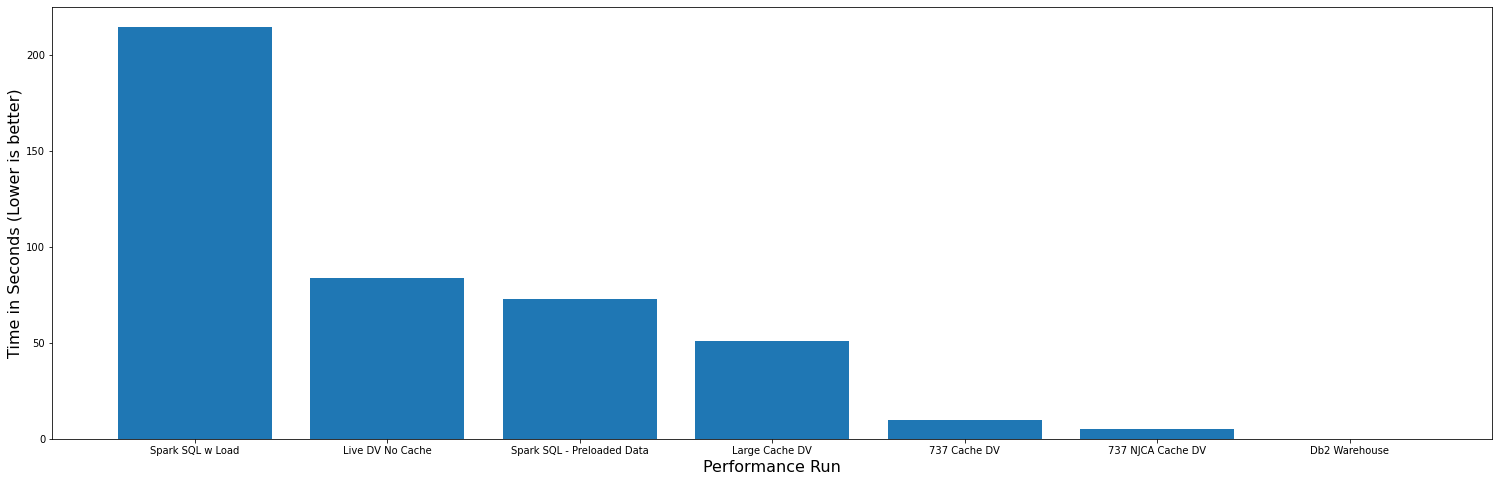

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0,0,1,1])
runs = ['Spark SQL w Load', 'Live DV No Cache','Spark SQL - Preloaded Data','Large Cache DV','737 Cache DV','737 NJCA Cache DV','Db2 Warehouse']
runtime = [sparklive/1000,dvlive/1000,sparksql/1000,dvbigcache/1000,dv737cache/1000,dv737NJCAcache/1000,db2w/1000]
ax.bar(runs, runtime)
plt.ylabel("Time in Seconds (Lower is better)", fontsize=16)
plt.xlabel("Performance Run", fontsize=16)
plt.show()

In [ ]:
%%time
databaseAPI.refreshCache('DV20211115151427714635')